In [1]:
import numpy as np
import excipy
from typing import List, Tuple, Dict, Optional, Union, Any
from excipy.processes import couplings_neighbours_fast, hopping_rate, add_exciton_random
from excipy.tools import *
from excipy.pbc import *
import matplotlib.pyplot as plt

In [31]:
FILENAME = "oct_no_org_mapbi3.cif"


# cut-off for interaction in A
CUTOFF = 10  # 20

# Transition dipole moment in a.u.
mu0 = np.array([2.05634, -0.0297, -0.0109])

# getting molecule and cell information
SUPERCELL = [10, 10, 10]
cell = ase.io.read(FILENAME)
super_cell = cell.repeat(SUPERCELL)
print(SUPERCELL, "supercell created.")
print(f"super_cell:{super_cell}")
print(f"len(super_cell):{len(super_cell)}")


# print(my_indcs) from original_seperate: [0, np.int64(1), np.int64(2), np.int64(3), np.int64(3), np.int64(37), np.int64(362), np.int64(4), np.int64(40), np.int64(36), np.int64(360), np.int64(5), np.int64(6), np.int64(7), np.int64(366), np.int64(41), np.int64(42), np.int64(43), np.int64(77), np.int64(38), np.int64(39), np.int64(33), np.int64(398), np.int64(361), np.int64(363), np.int64(322), np.int64(397), np.int64(8), np.int64(44), np.int64(364), np.int64(80), np.int64(76), np.int64(32), np.int64(396), np.int64(320), np.int64(9), np.int64(10), np.int64(11), np.int64(370), np.int64(45), np.int64(46), np.int64(47), np.int64(365), np.int64(367), np.int64(326), np.int64(81), np.int64(82), np.int64(83), np.int64(117), np.int64(78), np.int64(79), np.int64(73), np.int64(34), np.int64(35), np.int64(29), np.int64(394), np.int64(399), np.int64(358), np.int64(393), np.int64(321), np.int64(323), np.int64(282), np.int64(357), np.int64(12), np.int64(48), np.int64(368), np.int64(84), np.int64(324), np.int64(120), np.int64(116), np.int64(72), np.int64(28), np.int64(392), np.int64(356), np.int64(280), np.int64(13), np.int64(14), np.int64(15), np.int64(374), np.int64(49), np.int64(50), np.int64(51), np.int64(369), np.int64(371), np.int64(330), np.int64(85), np.int64(86), np.int64(87), np.int64(325), np.int64(327), np.int64(286), np.int64(121), np.int64(122), np.int64(123), np.int64(157), np.int64(118), np.int64(119), np.int64(113), np.int64(74), np.int64(75), np.int64(69), np.int64(30), np.int64(31), np.int64(25), np.int64(390), np.int64(395), np.int64(354), np.int64(389), np.int64(359), np.int64(318), np.int64(353), np.int64(281), np.int64(283), np.int64(242), np.int64(317), np.int64(16), np.int64(52), np.int64(372), np.int64(88), np.int64(328), np.int64(124), np.int64(284), np.int64(160), np.int64(156), np.int64(112), np.int64(68), np.int64(24), np.int64(388), np.int64(352), np.int64(316), np.int64(240), np.int64(17), np.int64(18), np.int64(19), np.int64(378), np.int64(53), np.int64(54), np.int64(55), np.int64(373), np.int64(375), np.int64(334), np.int64(89), np.int64(90), np.int64(91), np.int64(329), np.int64(331), np.int64(290), np.int64(125), np.int64(126), np.int64(127), np.int64(285), np.int64(287), np.int64(246), np.int64(161), np.int64(162), np.int64(163), np.int64(197), np.int64(158), np.int64(159), np.int64(153), np.int64(114), np.int64(115), np.int64(109), np.int64(70), np.int64(71), np.int64(65), np.int64(26), np.int64(27), np.int64(21), np.int64(386), np.int64(391), np.int64(350), np.int64(385), np.int64(355), np.int64(314), np.int64(349), np.int64(319), np.int64(278), np.int64(313), np.int64(241), np.int64(243), np.int64(202), np.int64(277), np.int64(20), np.int64(56), np.int64(376), np.int64(92), np.int64(332), np.int64(128), np.int64(288), np.int64(164), np.int64(244), np.int64(200), np.int64(196), np.int64(152), np.int64(108), np.int64(64), np.int64(384), np.int64(348), np.int64(312), np.int64(276), np.int64(22), np.int64(23), np.int64(382), np.int64(57), np.int64(58), np.int64(59), np.int64(377), np.int64(379), np.int64(338), np.int64(93), np.int64(94), np.int64(95), np.int64(333), np.int64(335), np.int64(294), np.int64(129), np.int64(130), np.int64(131), np.int64(289), np.int64(291), np.int64(250), np.int64(165), np.int64(166), np.int64(167), np.int64(245), np.int64(247), np.int64(206), np.int64(201), np.int64(203), np.int64(237), np.int64(198), np.int64(199), np.int64(193), np.int64(154), np.int64(155), np.int64(149), np.int64(110), np.int64(111), np.int64(105), np.int64(66), np.int64(67), np.int64(61), np.int64(387), np.int64(346), np.int64(381), np.int64(351), np.int64(310), np.int64(345), np.int64(315), np.int64(274), np.int64(309), np.int64(279), np.int64(238), np.int64(273), np.int64(60), np.int64(380), np.int64(96), np.int64(336), np.int64(132), np.int64(292), np.int64(168), np.int64(248), np.int64(204), np.int64(236), np.int64(192), np.int64(148), np.int64(104), np.int64(344), np.int64(308), np.int64(272), np.int64(62), np.int64(63), np.int64(383), np.int64(342), np.int64(97), np.int64(98), np.int64(99), np.int64(337), np.int64(339), np.int64(298), np.int64(133), np.int64(134), np.int64(135), np.int64(293), np.int64(295), np.int64(254), np.int64(169), np.int64(170), np.int64(171), np.int64(249), np.int64(251), np.int64(210), np.int64(205), np.int64(207), np.int64(239), np.int64(233), np.int64(194), np.int64(195), np.int64(189), np.int64(150), np.int64(151), np.int64(145), np.int64(106), np.int64(107), np.int64(101), np.int64(347), np.int64(306), np.int64(341), np.int64(311), np.int64(270), np.int64(305), np.int64(275), np.int64(234), np.int64(269), np.int64(100), np.int64(340), np.int64(136), np.int64(296), np.int64(172), np.int64(252), np.int64(208), np.int64(232), np.int64(188), np.int64(144), np.int64(304), np.int64(268), np.int64(102), np.int64(103), np.int64(343), np.int64(302), np.int64(137), np.int64(138), np.int64(139), np.int64(297), np.int64(299), np.int64(258), np.int64(173), np.int64(174), np.int64(175), np.int64(253), np.int64(255), np.int64(214), np.int64(209), np.int64(211), np.int64(235), np.int64(229), np.int64(190), np.int64(191), np.int64(185), np.int64(146), np.int64(147), np.int64(141), np.int64(307), np.int64(266), np.int64(301), np.int64(271), np.int64(230), np.int64(265), np.int64(140), np.int64(300), np.int64(176), np.int64(256), np.int64(212), np.int64(228), np.int64(184), np.int64(264), np.int64(142), np.int64(143), np.int64(303), np.int64(262), np.int64(177), np.int64(178), np.int64(179), np.int64(257), np.int64(259), np.int64(218), np.int64(213), np.int64(215), np.int64(231), np.int64(225), np.int64(186), np.int64(187), np.int64(181), np.int64(267), np.int64(226), np.int64(261), np.int64(180), np.int64(260), np.int64(216), np.int64(224), np.int64(182), np.int64(183), np.int64(263), np.int64(222), np.int64(217), np.int64(219), np.int64(227), np.int64(221), np.int64(220), np.int64(223)]

[10, 10, 10] supercell created.
super_cell:Atoms(symbols='I3000Pb1000', pbc=True, cell=[63.114999999999995, 63.114999999999995, 63.160999999999994], spacegroup_kinds=...)
len(super_cell):4000


In [32]:
from ase.visualize import view

# s[0:4]
# view(super_cell)
len(super_cell)

4000

In [33]:
def create_molecule_list(cell, supercell_dims=[1, 1, 1], mol_size=4):
    """
    Create a list of molecules from repeated unit cell.
    Assumes each molecule contains `mol_size` atoms.

    Args:
        cell (ase.Atoms): Cell or supercell object.
        supercell_dims (list or tuple): Supercell replication.
        mol_size (int): Number of atoms per molecule.

    Returns:
        list of (id, ase.Atoms): List of molecules with IDs.
    """
    supcell = cell.repeat(supercell_dims)
    molecules = []
    num_mols = int(len(supcell) / mol_size)
    for i in range(num_mols):
        single_mol = supcell[i * mol_size : (i + 1) * mol_size]
        single_mol.mol_id = i

        # Assign random transition dipole moments (for demo/testing)
        single_mol.tdm = np.random.rand(3)

        molecules.append((i, single_mol))
    print(f"System contains {len(molecules)} molecules.")
    return molecules

In [34]:
molecules = create_molecule_list(super_cell)

System contains 1000 molecules.


In [35]:
super_cell.cell.cellpar()

array([63.115, 63.115, 63.161, 90.   , 90.   , 90.   ])

In [36]:
import numpy as np
from scipy.spatial import cKDTree


def get_molecule_neighbors(
    molecules: List[Tuple[int, Atoms]],
    cutoff: float = 20.0,
    box: Optional[Union[List[float], np.ndarray]] = None,
) -> Dict[int, List[int]]:
    """
    Find neighboring molecules within cutoff distance, considering periodic boundaries if box provided.

    Args:
        molecules (List[Tuple[int, Atoms]]): List of tuples (id, Atoms).
        cutoff (float, optional): Distance cutoff in Å. Defaults to 20.0.
        box (Optional[Union[List[float], np.ndarray]], optional): Periodic box dimensions [Lx, Ly, Lz]. Defaults to None.

    Returns:
        Dict[int, List[int]]: Dictionary mapping each molecule id to list of neighboring molecule ids.
    """
    ids, mols = zip(*molecules)
    coords = np.array([mol.get_center_of_mass() for mol in mols])

    kdtree = cKDTree(coords, boxsize=box)
    neighbors_idx = kdtree.query_ball_point(coords, cutoff)

    neighbors_dict = {}
    for i, idx_list in enumerate(neighbors_idx):
        mol_id = ids[i]
        neighbor_ids = [ids[j] for j in idx_list if j != i]
        neighbors_dict[mol_id] = neighbor_ids

    return neighbors_dict

In [37]:
#unitcell_lengths = super_cell.cell.cellpar()[:3] / np.array(SUPERCELL)
#min_dist_threshold = np.min(unitcell_lengths)
#min_dist_threshold = np.min(unitcell_lengths)

#print(min_dist_threshold)
#if dist < min_dist_threshold or dist > cutoff:


In [38]:
def unit_vector(v: np.ndarray) -> np.ndarray:
    """
    Normalize a vector.

    Args:
        v (np.ndarray): Input vector.

    Returns:
        np.ndarray: Unit vector in the direction of v.
    """
    return v / np.linalg.norm(v)


def pbc_shift(vec: np.ndarray, box: Optional[np.ndarray]) -> np.ndarray:
    """
    Apply periodic boundary conditions to a displacement vector.

    Args:
        vec (np.ndarray): Displacement vector.
        box (Optional[np.ndarray]): Periodic box lengths (Lx, Ly, Lz).

    Returns:
        np.ndarray: Displacement vector adjusted for periodic boundaries.
    """
    if box is None:
        return vec
    return vec - box * np.round(vec / box)


# def get_center_of_mass(self, scaled=False, indices=None):
#    """Get the center of mass.
#
#    Parameters
#    ----------
#    scaled : bool
#        If True, the center of mass in scaled coordinates is returned.
#    indices : list | slice | str, default: None
#        If specified, the center of mass of a subset of atoms is returned.
#    """
#    if indices is None:
#        indices = slice(None)
#    elif isinstance(indices, str):
#        indices = string2index(indices)
#
#    masses = self.get_masses()[indices]
#    com = masses @ self.positions[indices] / masses.sum()
#    if scaled:
#        return self.cell.scaled_positions(com)
#    return com  # Cartesian coordinates


def get_molecule_neighbors_and_couplings(
    molecules: List[Tuple[int, Atoms]],
    cutoff: float = 20.0,
    box: Optional[Union[List[float], np.ndarray]] = None,
) -> Tuple[Dict[int, List[int]], csr_matrix]:
    """
    Find neighbors and calculate dipole-dipole coupling matrix between molecules within cutoff.

    Args:
        molecules (List[Tuple[int, Atoms]]): List of (id, Atoms) tuples. Each Atoms must have `.tdm` attribute.
        cutoff (float, optional): Distance cutoff in Å. Defaults to 20.0.
        box (Optional[Union[List[float], np.ndarray]], optional): Periodic box lengths. Defaults to None.

    Returns:
        Tuple[Dict[int, List[int]], csr_matrix]: neighbors_dict mapping molecule id to list of neighbor ids,
                                                and a sparse symmetric matrix of couplings.
    """
    # Defines the Bohr radius constant a0 in angstroms (used for unit conversion in coupling calculations).
    a0 = 0.529177  # Bohr radius in Å
    
    unitcell_lengths = super_cell.cell.cellpar()[:3] / np.array(SUPERCELL)
    min_dist_threshold = np.min(unitcell_lengths)

    ids, mols = zip(*molecules)
    coords = np.array([mol.get_center_of_mass() for mol in mols])

    # Builds a spatial KD-tree data structure from coords to enable efficient neighbor search.
    # Uses boxsize to consider periodic boundary conditions if box is provided.
    kdtree = cKDTree(coords, boxsize=box)

    # For each molecule coordinate, finds all neighboring molecules within the cutoff radius.
    # Returns a list of neighbor indices for each molecule.
    neighbors_idx = kdtree.query_ball_point(coords, cutoff)

    neighbors_dict: Dict[int, List[int]] = {}
    rows, cols, data = [], [], []

    # Loops over each molecule index i and its list of neighboring indices idx_list.
    for i, idx_list in enumerate(neighbors_idx):
        mol_i = mols[i]
        id_i = ids[i]
        center = coords[i]
        neighbor_ids = []

        # Loops over each neighbor index j in the neighbor list.
        for j in idx_list:
            if j == i:
                continue

            mol_j = mols[j]
            id_j = ids[j]
            target = coords[j]

            # Calculates the displacement vector disp from molecule i to neighbor j.
            # Uses pbc_shift to apply periodic boundary conditions shifts if box is given (handles minimum image convention).
            disp = pbc_shift(target - center, box if box is not None else None)

            # Computes the Euclidean distance between the two molecules.
            dist = np.linalg.norm(disp)
            
            if dist < min_dist_threshold or dist > cutoff: # if dist < 1e-3 or dist > cutoff
                continue

            neighbor_ids.append(id_j)

            # Dipole-dipole coupling
            D_i = mol_i.tdm
            D_j = mol_j.tdm

            # Calculates the angular factor k for dipole-dipole coupling:
            # Uses the standard dipole-dipole interaction formula involving dot products of unit vectors of dipoles and displacement vector.
            k = np.dot(unit_vector(D_i), unit_vector(D_j)) - 3 * np.dot(
                unit_vector(disp), unit_vector(D_i)
            ) * np.dot(unit_vector(disp), unit_vector(D_j))

            # Calculates the dipole-dipole coupling strength:
            # Scales angular factor k by dipole magnitudes.
            # Divides by the cube of distance (in atomic units: distance normalized by Bohr radius a0).
            coupling = (
                k * np.linalg.norm(D_i) * np.linalg.norm(D_j) / ((dist / a0) ** 3)
            )

            # Fill symmetric matrix entries
            rows += [i, j]
            cols += [j, i]
            data += [coupling / 2, coupling / 2]

        neighbors_dict[id_i] = neighbor_ids

    V_csr = csr_matrix(
        (data, (rows, cols)), shape=(len(molecules), len(molecules)), dtype=np.float32
    )

    return neighbors_dict, V_csr

In [39]:

box = super_cell.cell.cellpar()[:3]
#neighbors = get_molecule_neighbors(molecules, cutoff=10.0, box=box)
neighbors, V_csr = get_molecule_neighbors_and_couplings(molecules, cutoff=10.0, box=box)

In [40]:
from ase.visualize import view


def visualize_molecule_and_neighbors(
    mol_id: int,
    molecules: List[Tuple[int, Atoms]],
    neighbors_dict: Dict[int, List[int]],
) -> None:
    """
    Visualize a molecule and its neighbors with ASE viewer, coloring them by tags.

    Args:
        mol_id (int): Index of molecule in molecules list to visualize.
        molecules (List[Tuple[int, Atoms]]): List of (id, Atoms) tuples.
        neighbors_dict (Dict[int, List[int]]): Neighbor mapping {mol_id: [neighbor_ids]}.
    """
    central_id, central_mol = molecules[mol_id]

    # Tag central molecule atoms as 1
    central_mol.set_tags([1] * len(central_mol))

    neighbor_ids = neighbors_dict[central_id]

    neighbor_mols = []
    for j in neighbor_ids:
        neighbor = molecules[j][1].copy()
        neighbor.set_tags([2] * len(neighbor))
        neighbor_mols.append(neighbor)

    combined = Atoms()
    combined += central_mol
    for neighbor in neighbor_mols:
        combined += neighbor

    view(combined)


# visualize_molecule_and_neighbors(30, molecules, neighbors)

In [41]:
from scipy.sparse import csr_matrix


def build_sparse_k_matrix(
    molecules: List[Tuple[int, Atoms]],
    neighbors_dict: Dict[int, List[int]],
    rate: float = 1e9,
) -> csr_matrix:
    """
    Construct a sparse hopping rate matrix between neighboring sites.

    Args:
        molecules (List[Tuple[int, Atoms]]): List of molecules with IDs.
        neighbors_dict (Dict[int, List[int]]): Neighboring molecule IDs.
        rate (float, optional): Hopping rate for all neighbor pairs. Defaults to 1e9.

    Returns:
        csr_matrix: Sparse hopping rate matrix of shape (N_sites, N_sites).
    """
    num_sites = len(molecules)
    row, col, data = [], [], []

    for i, _ in molecules:
        for j in neighbors_dict[i]:
            row.append(i)
            col.append(j)
            data.append(rate)

    k_sparse = csr_matrix(
        (data, (row, col)), shape=(num_sites, num_sites), dtype=np.float64
    )
    return k_sparse


# === Build matrices
sparse_k_matrix = build_sparse_k_matrix(molecules, neighbors)


print("Sparse matrix shape:", sparse_k_matrix.shape)
print("\nMemory usage:")
print(f"Sparse matrix (data): {sparse_k_matrix.data.nbytes} bytes")
print(f"Sparse matrix (indices): {sparse_k_matrix.indices.nbytes} bytes")
print(f"Sparse matrix (indptr): {sparse_k_matrix.indptr.nbytes} bytes")
total_sparse = (
    sparse_k_matrix.data.nbytes
    + sparse_k_matrix.indices.nbytes
    + sparse_k_matrix.indptr.nbytes
)
print(f"Total sparse matrix size: {total_sparse} bytes ({total_sparse / 1024:.2f} KB)")

Sparse matrix shape: (1000, 1000)

Memory usage:
Sparse matrix (data): 124800 bytes
Sparse matrix (indices): 62400 bytes
Sparse matrix (indptr): 4004 bytes
Total sparse matrix size: 191204 bytes (186.72 KB)


In [ ]:
import numpy as np
import random
import concurrent.futures
from functools import partial
from excipy.processes import hopping_rate
import sys


class Exciton:
    """
    Simple exciton class that keeps track of which site it occupies and its periodic image.

    Attributes:
        site (int): Index of site occupied by the exciton.
        imx, imy, imz (int): Periodic image offsets.
        uid (int): Unique identifier for each exciton.
    """

    _counter = 0

    def __init__(self, site: int, image: Tuple[int, int, int] = (0, 0, 0)) -> None:
        """
        Initialize an Exciton instance.

        Args:
            site (int): Site index where exciton resides.
            image (Tuple[int, int, int], optional): Periodic image indices (imx, imy, imz).
        """
        self.site = site
        self.imx, self.imy, self.imz = image
        self.uid = Exciton._counter
        Exciton._counter += 1


def run_kmc_PBC(
    system: Optional[List[Tuple[int, Any]]] = None,
    num_excitation_centers: int = 1,
    excitation_centers: Optional[List[int]] = None,
    exciton_init_mode: str = "delta",  # NEW
    gaussian_sigma: Optional[float] = None,  # NEW
    coupling_matrix: Optional[Union[csr_matrix, np.ndarray]] = None,
    overlap: Optional[float] = None,
    hop_rate: float = 1e9,
    decay_rate: float = 1e9,
    annih_rate: float = 1e12,
    neighbors: Optional[Dict[int, List[int]]] = None,
    max_time: float = 1e-6,
    max_steps: int = 10000,
    verbose: bool = False,
    box: Optional[Union[List[float], np.ndarray]] = None,
) -> Tuple[List[float], List[List[Tuple[int, int, int, int, int]]]]:
    """
    Run a kinetic Monte Carlo (KMC) simulation with periodic boundary conditions.

    Parameters
    ----------
    system : Optional[List[Tuple[int, Any]]]
        List of molecules/sites in the system. Each element should be a tuple
        (id, Atoms) or similar with coordinate access.
    num_excitation_centers : int, optional
        Number of excitons to simulate (ignored if excitation_centers provided).
    excitation_centers : Optional[List[int]], optional
        List of initial exciton site indices. If provided, overrides num_excitation_centers.
    coupling_matrix : Optional[Union[csr_matrix, np.ndarray]], optional
        Matrix of hopping couplings or None to use uniform hop_rate.
    overlap : Optional[float], optional
        Overlap factor used to scale hopping rates, if coupling_matrix provided.
    hop_rate : float, optional
        Default uniform hopping rate if no coupling_matrix is provided.
    decay_rate : float, optional
        Exciton decay rate (s^-1).
    annih_rate : float, optional
        Exciton annihilation rate (s^-1) when two excitons share a site.
    neighbors : Optional[Dict[int, List[int]]], optional
        Dictionary mapping site index to list of neighbor site indices.
        If None, a 1D chain connectivity is assumed.
    max_time : float, optional
        Maximum simulation time in seconds.
    max_steps : int, optional
        Maximum number of KMC steps.
    verbose : bool, optional
        If True, prints progress and messages.
    box : Optional[Union[List[float], np.ndarray]], optional
        Periodic box dimensions (Lx, Ly, Lz) or None for open boundary.

    Returns
    -------
    Tuple[List[float], List[List[Tuple[int, int, int, int, int]]]]
        - List of times (in nanoseconds) at which events occurred.
        - List of exciton states at each recorded time step, where each exciton
          is represented as tuple (uid, site, imx, imy, imz).
    """
    Exciton._counter = 0  # reset exciton IDs

    if system is None:
        sys.exit("Error: Please specify your system!")
    else:
        num_sites = len(system)

    coords = None
    if box is not None:
        coords = np.array([mol[1].get_center_of_mass() for mol in system])
        # TODO: chechk box/coord relation,
        # Done: coords are used in periodic boundary condition handling when hopping happens
        box = np.asarray(box, dtype=float)

    # Setup default neighbors for a 1D chain if none provided
    if neighbors is None:
        neighbors = {i: [] for i in range(num_sites)}
        for i in range(num_sites):
            if i > 0:
                neighbors[i].append(i - 1)
            if i < num_sites - 1:
                neighbors[i].append(i + 1)

    # =======
    excitons: List[Exciton] = []

    if exciton_init_mode not in ("delta", "gaussian"):
        raise ValueError(
            f"Invalid exciton_init_mode '{exciton_init_mode}', must be 'delta' or 'gaussian'."
        )

    # Default sigma based on number of sites
    if gaussian_sigma is None:
        gaussian_sigma = max(1, num_sites / 10)  # adjust as needed

    # Initialize excitons
    # TODO: handle out of range center and sigma for given gaussian
    if excitation_centers is None:

        if exciton_init_mode == "delta":
            for _ in range(num_excitation_centers):
                site_idx = random.randint(0, num_sites - 1)
                excitons.append(Exciton(site_idx))

        elif exciton_init_mode == "gaussian":
            centers = random.sample(range(num_sites), k=num_excitation_centers)

            for center in centers:
                # Generate Gaussian distribution around each center
                # choose excitation_sites around center considering gaussian distribution
                # initialize excitons with each choosen site (idx)with excitons.append(Exciton(idx))

    else:
        # excitation_centers is provided → treat as exact sites or Gaussian centers
        if exciton_init_mode == "delta":
            for site_idx in excitation_centers:
                excitons.append(Exciton(site_idx))

        elif exciton_init_mode == "gaussian":
            for center in excitation_centers:
                # Generate Gaussian distribution around each center
                # choose excitation_sites around center considering gaussian distribution
                # initialize excitons with each choosen site (idx)with excitons.append(Exciton(idx))
    # =======

    # if excitation_centers is None:
    #    for _ in range(num_excitation_centers):
    #        # TODO: ad gaussian dist initialization
    #        site_idx = random.randint(0, num_sites - 1)
    #        excitons.append(Exciton(site_idx))
    # else:
    #    for site_idx in excitation_centers:
    #        excitons.append(Exciton(site_idx))
    # =======

    times: List[float] = [0.0]
    exciton_records: List[List[Tuple[int, int, int, int, int]]] = [
        [(ex.uid, ex.site, ex.imx, ex.imy, ex.imz) for ex in excitons]
    ]

    current_time = 0.0
    step_count = 0

    while True:
        step_count += 1
        if step_count > max_steps:
            if verbose:
                print("Maximum number of steps reached!!")
            break

        # Collect possible events: decay, hop, annihilation
        events = []

        # Decay events
        for ex_idx, ex in enumerate(excitions := excitons):
            events.append(("decay", ex_idx, decay_rate))

        # Hopping events
        for ex_idx, ex in enumerate(excitions):
            site_i = ex.site
            for site_j in neighbors[site_i]:
                if coupling_matrix is None:
                    hop_rate_ij = hop_rate
                else:
                    hop_rate_ij = hopping_rate(
                        site_i, site_j, coupling_matrix, J=overlap
                    )
                if hop_rate_ij > 0:
                    events.append(("hop", ex_idx, site_j, hop_rate_ij))

        # Annihilation events: when multiple excitons occupy same site + image
        site_occupancy: Dict[Tuple[int, int, int, int], List[int]] = {}
        for ex_idx, ex in enumerate(excitions):
            key = (ex.site, ex.imx, ex.imy, ex.imz)
            site_occupancy.setdefault(key, []).append(ex_idx)

        for site_key, ex_list in site_occupancy.items():
            if len(ex_list) > 1:
                for i in range(len(ex_list)):
                    for j in range(i + 1, len(ex_list)):
                        events.append(("annih", ex_list[i], ex_list[j], annih_rate))

        if not events:
            if verbose:
                print("No events left.")
            break

        total_rate = sum(ev[-1] for ev in events)
        dt = -np.log(random.random()) / total_rate
        current_time += dt
        if current_time > max_time:
            if verbose:
                print("Max time exceeded.")
            break

        # Choose event weighted by rates
        threshold = random.random() * total_rate
        running = 0.0
        chosen_event = None
        for ev in events:
            running += ev[-1]
            if running >= threshold:
                chosen_event = ev
                break

        etype = chosen_event[0]

        if etype == "decay":
            ex_idx = chosen_event[1]
            excitons.pop(ex_idx)

        elif etype == "hop":
            ex_idx, nb_site = chosen_event[1], chosen_event[2]
            ex = excitons[ex_idx]

            if coords is not None:
                dr = coords[nb_site] - coords[ex.site]
                half = box * 0.5

                shift = np.zeros(3, dtype=int)
                shift[dr > half] = -1
                shift[dr < -half] = 1

                ex.imx += shift[0]
                ex.imy += shift[1]
                ex.imz += shift[2]

            ex.site = nb_site

        elif etype == "annih":
            ex_i, ex_j = chosen_event[1], chosen_event[2]
            victim = random.choice([ex_i, ex_j])
            excitons.pop(victim)

        times.append(current_time / 1e-9)  # convert to ns
        exciton_records.append(
            [(ex.uid, ex.site, ex.imx, ex.imy, ex.imz) for ex in excitons]
        )

        if len(excitions) == 0:
            if verbose:
                print("All excitons decayed or annihilated.")
            break

    return times, exciton_records


def run_kmc_PBC_parallel(
    num_trajectories: int = 10, processors: int = 2, **kmc_kwargs
) -> List[Tuple[List[float], List[List[Tuple[int, int, int, int, int]]]]]:
    """
    Run multiple KMC trajectories in parallel using multiprocessing.

    Parameters
    ----------
    num_trajectories : int, optional
        Number of KMC trajectories to simulate.
    processors : int, optional
        Number of parallel worker processes.
    **kmc_kwargs : dict
        Additional keyword arguments to pass to run_kmc_PBC.

    Returns
    -------
    List[Tuple[List[float], List[List[Tuple[int, int, int, int, int]]]]]
        List of tuples (times, exciton_records) for each trajectory.
    """
    run_kmc_partial = partial(run_kmc_PBC, **kmc_kwargs)

    results = []
    with concurrent.futures.ProcessPoolExecutor(max_workers=processors) as executor:
        futures_dict = {}
        for i in range(num_trajectories):
            futures_dict[executor.submit(run_kmc_partial)] = i

        for future in concurrent.futures.as_completed(futures_dict):
            traj_id = futures_dict[future]
            times, excitons = future.result()
            print(f"Trajectory {traj_id + 1} done!")
            results.append((times, excitons))

    return results

In [43]:
results = run_kmc_PBC_parallel(
    num_trajectories=64,
    processors=32,
    system=molecules,  # mol,
    neighbors=neighbors,
    exciton_init_mode="gaussian",
    #gaussian_sigma= 6,  # adjust as needed
    num_excitons=5,  # if exc_list is not None, then ignored!
    # exc_list=add_exciton_random(molecules, NUM_EXC), # add_exciton_random(mol, NUM_EXC),
    coupling_matrix=V_csr / 1.35,
    overlap=1.22,
    decay_rate=4 * 1e9,
    annih_rate=1e15,
    max_time=1.2e-9,
    max_steps=900000,
    box=box,  # (a, b, c),
    verbose=True,
)

All excitons decayed or annihilated.
Trajectory 19 done!
All excitons decayed or annihilated.
Trajectory 21 done!
All excitons decayed or annihilated.
Trajectory 23 done!
All excitons decayed or annihilated.
All excitons decayed or annihilated.
Trajectory 5 done!
Trajectory 12 done!
All excitons decayed or annihilated.
All excitons decayed or annihilated.
Trajectory 13 done!
Trajectory 2 done!
All excitons decayed or annihilated.
Trajectory 7 done!
All excitons decayed or annihilated.
All excitons decayed or annihilated.
All excitons decayed or annihilated.
Trajectory 9 done!
All excitons decayed or annihilated.
Trajectory 11 done!
Trajectory 25 done!
All excitons decayed or annihilated.
Trajectory 30 done!
Trajectory 4 done!
All excitons decayed or annihilated.
All excitons decayed or annihilated.
Trajectory 26 done!
All excitons decayed or annihilated.
Trajectory 33 done!
All excitons decayed or annihilated.
All excitons decayed or annihilated.
Trajectory 18 done!
Trajectory 15 done!

In [44]:
def describe_kmc_output(results):
    print(f"Total trajectories: {len(results)}")
    for i, (times, excitons) in enumerate(results[:1]):  # just show 1st
        print(f"\nTrajectory {i}:")
        print(f"  Time steps: {len(times)}")
        print(f"  Exciton records: {len(excitons)} (should match time steps)")
        print(f"  Type of time array: {type(times)}")
        print(f"  Type of exciton record: {type(excitons)}")
        print(f"  First few time points: {times[:5]}")
        print(f"  First exciton snapshot: {excitons[0]}")  # At t = 0
        print(f"  Number of excitons at t=0: {len(excitons[0])}")
        print(f"  Example exciton tuple: {excitons[0][0]}")


describe_kmc_output(results)


Total trajectories: 64

Trajectory 0:
  Time steps: 8220
  Exciton records: 8220 (should match time steps)
  Type of time array: <class 'list'>
  Type of exciton record: <class 'list'>
  First few time points: [0.0, np.float64(6.522053903641466e-08), np.float64(1.663485897504228e-05), np.float64(4.65495325630497e-05), np.float64(8.022134250940063e-05)]
  First exciton snapshot: [(0, 37, 0, 0, 0), (1, 949, 0, 0, 0), (2, 997, 0, 0, 0), (3, 749, 0, 0, 0), (4, 254, 0, 0, 0), (5, 371, 0, 0, 0), (6, 251, 0, 0, 0), (7, 90, 0, 0, 0), (8, 112, 0, 0, 0), (9, 997, 0, 0, 0)]
  Number of excitons at t=0: 10
  Example exciton tuple: (0, 37, 0, 0, 0)


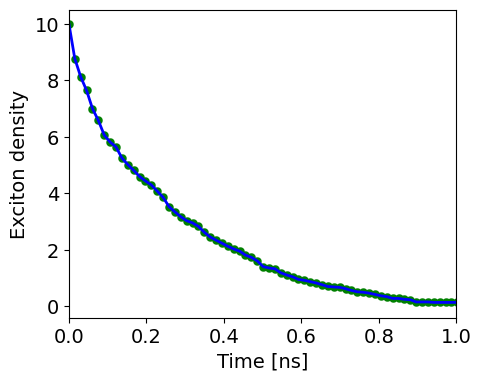

In [45]:
from excipy.analysis import plot_average_exciton_population

plot_average_exciton_population(results, num_bins=80, x0=0, xf=0.8)
plt.xlim(0, 1)
# plt.ylim(0.001,46)
plt.savefig("exciton_density.png", bbox_inches="tight")

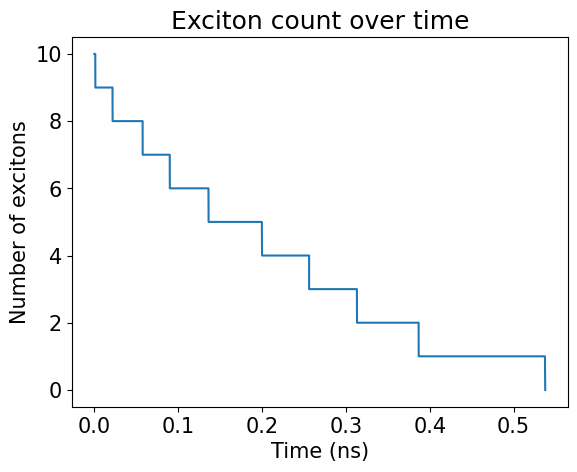

In [53]:
traj = results[10]
times = traj[0]
snapshots = traj[1]
n_excitons = [len(snap) for snap in snapshots]

import matplotlib.pyplot as plt
plt.plot(times, n_excitons)
plt.xlabel("Time (ns)")
plt.ylabel("Number of excitons")
plt.title("Exciton count over time")
plt.show()

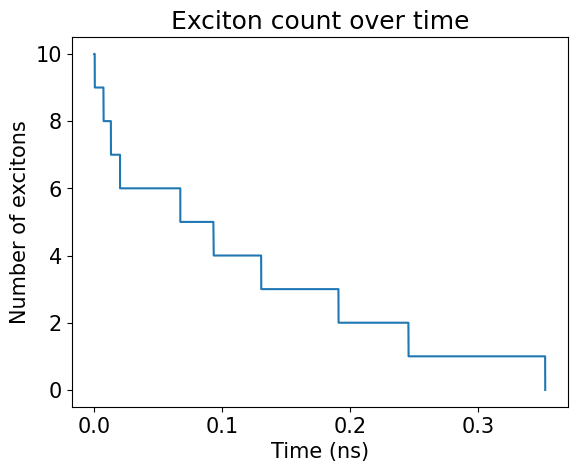

In [54]:
traj = results[1]
times = traj[0]
snapshots = traj[1]
n_excitons = [len(snap) for snap in snapshots]

import matplotlib.pyplot as plt
plt.plot(times, n_excitons)
plt.xlabel("Time (ns)")
plt.ylabel("Number of excitons")
plt.title("Exciton count over time")
plt.show()

In [47]:

#
ids, mols = zip(*molecules)
coords = np.array([mol.get_center_of_mass() for mol in mols])


In [48]:
coords.shape

(1000, 3)

Wrote 64 trajectories to output.h5


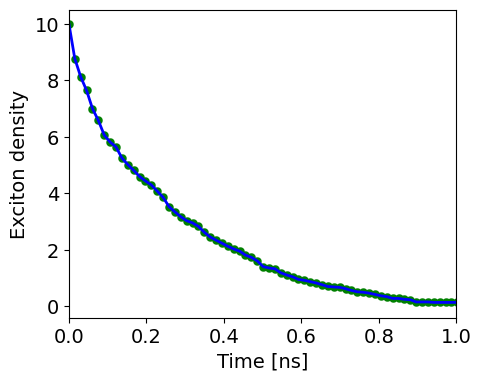

In [49]:
from excipy.analysis import dump_output, msd_all_runs
dump_output(results, "output.h5")



from excipy.analysis import plot_average_exciton_population
exc_den = plot_average_exciton_population(results, num_bins=80, x0=0, xf=1)
np.savetxt("density.dat", (exc_den[0], exc_den[1]), delimiter="\t", newline='\n',)
plt.xlim(0,1)
plt.savefig("exciton_density.png", bbox_inches="tight")




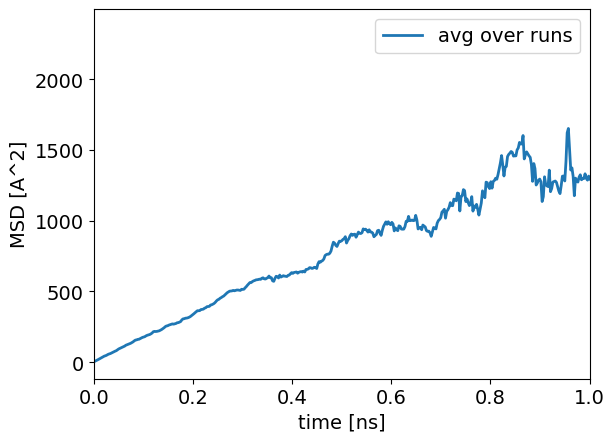

In [50]:
t_grid, msd_avg = msd_all_runs(results, coords, box=box)
np.savetxt("msd_avg.dat", (t_grid, msd_avg), delimiter="\t", newline='\n',)
plt.figure(1)
plt.plot(t_grid, msd_avg, lw=2, label='avg over runs')
plt.legend(); 
plt.xlim(0, 1)
plt.ylabel("MSD [A^2]")
plt.xlabel("time [ns]")
plt.savefig("msd_test.png")


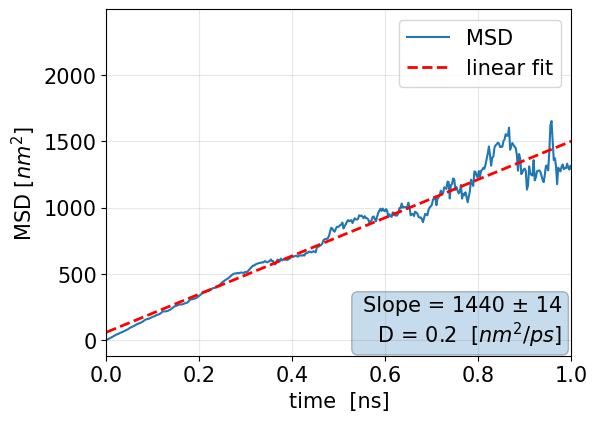

In [51]:
from excipy.analysis import plot_msd_with_fit

plot_msd_with_fit(t_grid, msd_avg, t_min=0, t_max=1.0)
plt.xlim(0,1)
plt.savefig("MSD_final.png", bbox_inches="tight")

In [ ]:
a = super_cell.get_cell()[0, 0]
b = super_cell.get_cell()[1, 1]
c = super_cell.get_cell()[2, 2]


coords = []
for _, molecule in molecules:
    coords.append(molecule.get_center_of_mass())
print(len(coords))
print(coords)

# mol = add_tdm(mu0, mol) # add rotated TDM to each molecule in the system

# neighbors, V = TDM_couplings_fast_PBC(molecules=mol, cutoff=20, box=(a,b,c))

# V_csr1 = csr_matrix(V, dtype=V.dtype)      # keeps only the non–zero entries
# print("dense aray :", V.shape, "   bytes:", V.nbytes / 1e6, "MB")
# print("sparse array   :", V.nnz,       "   bytes:", V.data.nbytes / 1e6, "MB")

10000
[array([3.73612804, 3.73612804, 3.58913408]), array([ 3.73612804, 10.04762804,  3.58913408]), array([ 3.73612804, 16.35912804,  3.58913408]), array([ 3.73612804, 22.67062804,  3.58913408]), array([ 3.73612804, 28.98212804,  3.58913408]), array([ 3.73612804, 35.29362804,  3.58913408]), array([ 3.73612804, 41.60512804,  3.58913408]), array([ 3.73612804, 47.91662804,  3.58913408]), array([ 3.73612804, 54.22812804,  3.58913408]), array([ 3.73612804, 60.53962804,  3.58913408]), array([ 3.73612804, 66.85112804,  3.58913408]), array([ 3.73612804, 73.16262804,  3.58913408]), array([ 3.73612804, 79.47412804,  3.58913408]), array([ 3.73612804, 85.78562804,  3.58913408]), array([ 3.73612804, 92.09712804,  3.58913408]), array([ 3.73612804, 98.40862804,  3.58913408]), array([  3.73612804, 104.72012804,   3.58913408]), array([  3.73612804, 111.03162804,   3.58913408]), array([  3.73612804, 117.34312804,   3.58913408]), array([  3.73612804, 123.65462804,   3.58913408]), array([  3.73612804, 129